In [1]:
%load_ext watermark
%watermark -a "Sushmit Roy" -u -d 

Sushmit Roy 
last updated: 2018-05-04


In [2]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [3]:
# Code 2.1
ways = np.array([0, 3, 8, 9, 0])
ways/ways.sum()
# Code 2.2
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

In [4]:
def posterior_grid_approx(grid_points=5,success=6, tosses=9):
    """
    Grid approximations
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)
    # define prior
    #prior = np.repeat(1,grid_points)
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    # compute likelihood at each value in grid
    likelihood = stats.binom.pmf(success,tosses, p_grid)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    # standardization
    posterior = unstd_posterior/sum(unstd_posterior)
    return p_grid, posterior



In [5]:
points = 5
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)

# Create a trace
trace1 = go.Scatter(
    x = p_grid,
    y = posterior,
    showlegend = False
    
)
points = 1000
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
trace2 = go.Scatter(
    x = p_grid,
    y = posterior,
    name = 'success = {}\n tosses = {}'.format(w, n)
)


fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('5 Points',
                                                          '20 Points'),print_grid=False)


fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title='Probability of Water')
fig['layout']['xaxis2'].update(title='Probability of Water')
fig['layout']

fig['layout']['yaxis1'].update(title='Posterior Probability')
fig['layout']['yaxis2'].update(title='Posterior Probability')
fig['layout'].update(height=400)

fig['layout'].update(paper_bgcolor='rgb(233,233,233)')
fig['layout'].update(plot_bgcolor='rgb(200, 200, 200)')

iplot(fig)

logp = -4.6987, ||grad|| = 5.5: 100%|██████████| 7/7 [00:00<00:00, 481.42it/s]


0.6486486493602608 [0.07848284]
[0.52321791 0.77407939]


Text(0,0.5,'Density')

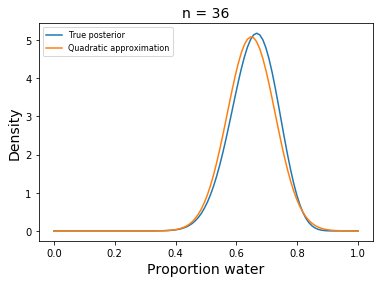

In [6]:

w, n = 24, 36
### with quadratic approximation

data = np.repeat((0, 1), (n-w, w))
with pm.Model() as normal_approximation:
    p  = pm.Uniform('p', 0, 1)
    t1 = pm.Bernoulli('t1',p)
    w = pm.Binomial('w', n=len(data), p=p, observed =data.sum() )
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
print(mean_q['p'], std_q)


norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
print(pi)

x = np.linspace(0, 1, 100)
w, n = 24, 36
## Analytical solution
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')
# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=8)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14)